# Sinais exponenciais de tempo contínuo

Renato Naville Watanabe

## Preparação do ambiente

In [2]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.4 MB/s eta 0:00:00


In [3]:
import sympy as sym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget

## Exponencial real

Primeiro, vamos considerar sinais exponencias de tempo contínuo da forma:

$$x(t) = e^{at}$$

Eles têm o gráfico da seguinte forma no caso da constate $a>0$:

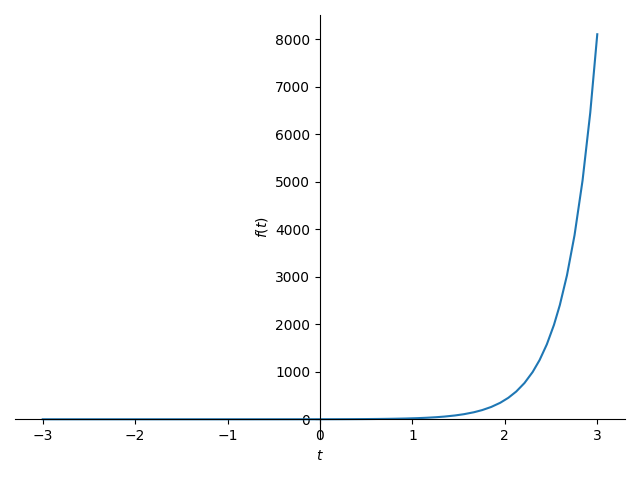

In [4]:
t = sym.symbols('t')
a = 3
x = sym.exp(a*t)
sym.plot(x, (t, -3, 3));


E para $a<0$:

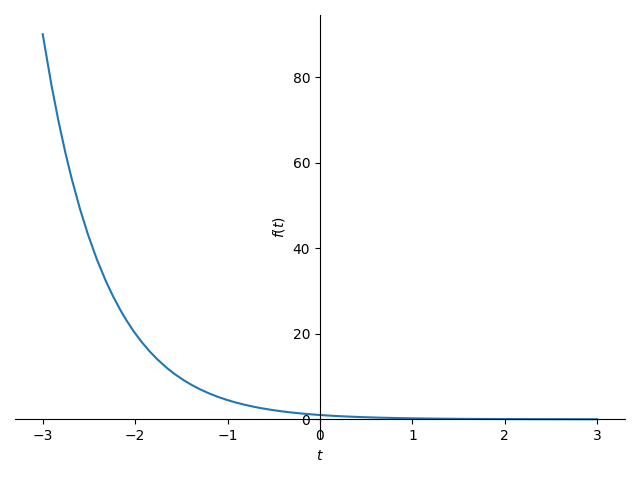

In [5]:
t = sym.symbols('t')
a = -1.5
x = sym.exp(a*t)
sym.plot(x, (t, -3, 3));

O inverso da constante $a$ é conhecido como **constante de tempo** e normalmente representada por $\tau$. Ela indica o tempo que o sinal exponencial leva para ficar $\frac{1}{e}$ menor do que no instante $t=0$.

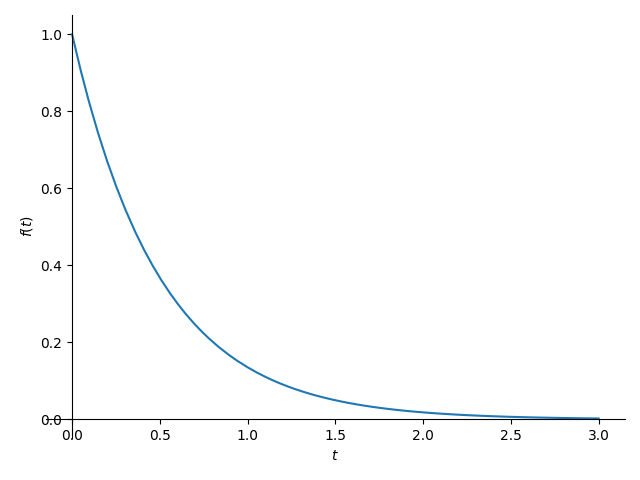

In [6]:
t = sym.symbols('t')
tau = 0.5
x = sym.exp(-t/tau)
y = sym.symbols('y')
p1 = sym.plot(x, (t, 0, 3))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([tau, 2*tau, 3*tau])
ax.set_xticklabels([r'$\tau$', r'$2\tau$', r'$3\tau$'])
ax.set_yticks([1, 1/2.71,  1/2.71**2,  1/2.71**3])
ax.set_yticklabels(['1', r'$\frac{1}{e}$', r'$\frac{1}{e^2}$', r'$\frac{1}{e^3}$'])
ax.plot([tau, tau, 0], [0, 1/2.71, 1/2.71], color='dodgerblue', ls='--')
ax.plot([2*tau, 2*tau, 0], [0, 1/2.71**2, 1/2.71**2], color='dodgerblue', ls='--')
ax.plot([3*tau, 3*tau, 0], [0, 1/2.71**3, 1/2.71**3], color='dodgerblue', ls='--')
fig.canvas.draw_idle()

## Exponenciais complexas

Agora vamos usar a representação polar de um número complexo para criar um sinal no tempo:

$$ x(t) = Ae^{j\omega_0 t}$$

Como é um sinal complexo, não conseguimos fazer o gráfico dele, mas ele será muito útil.

A primeira coisa que podemos notar é que esse sinal é periódico. Para verificar isso vamos usar a definição de sinal periódico:

$$x(t) = x(t+ T) \rightarrow Ae^{j\omega_0 t} = Ae^{j\omega_0 (t+T)} \rightarrow Ae^{j\omega_0 t} = Ae^{j\omega_0t}e^{j\omega_0T}$$

Para que os dois lados sejam iguais temos que:

$$e^{j\omega_0T} = 1$$

Isso acontece sempre que:

$$\omega_0T = k2\pi$$

Então, o período do sinal é, considerando $k=1$ (para termos o menor $T$ para o qual a expressão acima é verdadeira):

$$T = \frac{2\pi}{\omega_0}$$

### Senos e cossenos como exponenciais complexas


Utilizando a relação de Euler-Moivre, podemos escrever um sinal cosseno como uma soma de exponenciais complexas:

$$ e^{j(\omega t+\theta)} = \cos(\omega t+\theta)+j\mathrm{sen}(\omega t+\theta)$$

$$ e^{-j(\omega t+\theta)} = \cos(\omega t+\theta)-j\mathrm{sen}(\omega t+\theta)$$

Então,

$$\cos(\omega t+\theta) =  \frac{e^{j(\omega t+\theta)}+ e^{-j(\omega t+\theta)}}{2}$$

e

$$\mathrm{sen}(\omega t+\theta) =  \frac{e^{j(\omega t+\theta)} - e^{-j(\omega t+\theta)}}{2j}$$

A possibilidade de escrever os sinais seno e cosseno como soma de exponenciais complexas vai facilitar muito o desenvolvimento da teoria futura.

### Caso geral

Um sinal exponencial complexo mais geral é da forma:

$$x(t) = \frac{Ae^{rt + j\omega t + j\theta} + Ae^{rt - j\omega t - j\theta}}{2} = Ae^{rt}\frac{e^{j(\omega t + \theta)}+e^{-j(\omega t + \theta)}}{2} = Ae^{rt}\cos(\omega t+\theta)$$

O gráfico desse sinal, caso $r>0$, é a cossenoide com a sua amplitude modulada pela exponencial crescente:

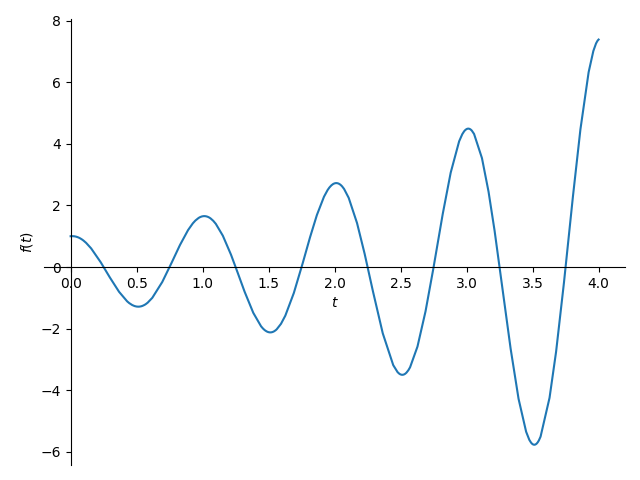

In [7]:
tau = 2
x = sym.exp(t/tau)*sym.cos(2*sym.pi*t)
y = sym.symbols('y')
p1 = sym.plot(x, (t, 0, 4))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([])
# ax.set_xticklabels([r'$\tau$', r'$2\tau$', r'$3\tau$'])
ax.set_yticks([])
# ax.set_yticklabels(['1', r'$\frac{1}{e}$', r'$\frac{1}{e^2}$', r'$\frac{1}{e^3}$'])
ax.plot(np.arange(0,4,0.05), np.exp(0.5*np.arange(0,4,0.05)), color='dodgerblue', ls='--')
ax.plot(np.arange(0,4,0.05), -np.exp(0.5*np.arange(0,4,0.05)), color='dodgerblue', ls='--')
# ax.plot([2*tau, 2*tau, 0], [0, 1/2.71**2, 1/2.71**2], color='dodgerblue', ls='--')
# ax.plot([3*tau, 3*tau, 0], [0, 1/2.71**3, 1/2.71**3], color='dodgerblue', ls='--')
fig.canvas.draw_idle()

E no caso de $r>0$, é a cossenoide com a sua amplitude modulada pela exponencial decrescente:



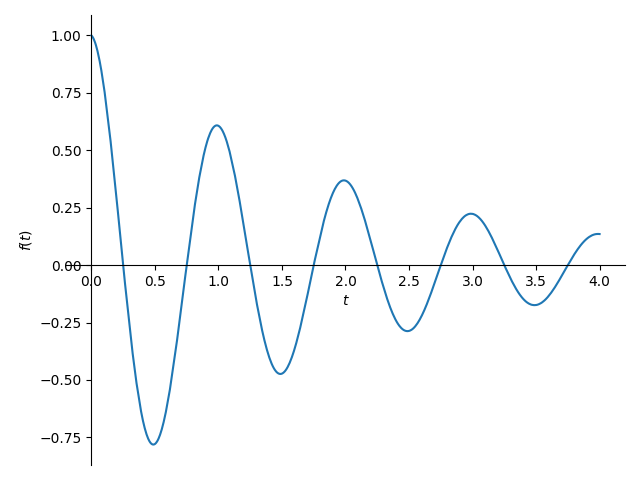

In [8]:
tau = -2
x = sym.exp(t/tau)*sym.cos(2*sym.pi*t)
y = sym.symbols('y')
p1 = sym.plot(x, (t, 0, 4))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([])
# ax.set_xticklabels([r'$\tau$', r'$2\tau$', r'$3\tau$'])
ax.set_yticks([])
# ax.set_yticklabels(['1', r'$\frac{1}{e}$', r'$\frac{1}{e^2}$', r'$\frac{1}{e^3}$'])
ax.plot(np.arange(0,4,0.05), np.exp(-0.5*np.arange(0,4,0.05)), color='dodgerblue', ls='--')
ax.plot(np.arange(0,4,0.05), -np.exp(-0.5*np.arange(0,4,0.05)), color='dodgerblue', ls='--')
# ax.plot([2*tau, 2*tau, 0], [0, 1/2.71**2, 1/2.71**2], color='dodgerblue', ls='--')
# ax.plot([3*tau, 3*tau, 0], [0, 1/2.71**3, 1/2.71**3], color='dodgerblue', ls='--')
fig.canvas.draw_idle()

### Somatório de exponencias complexas harmonicamente relacionadas

Exponenciais harmonicamente relacionadas $\phi_k(t)$ são exponenciais complexas que têm um período $T$ em comum (o termo "harmônico" tem o mesmo significado do empregado em música). Ou seja, são sinais com frequências que são múltiplas da menor frequência encontrada entre os sinais.

$\phi_k(t) = A_ke^{jk\omega_0 t}, k = 0,\pm 1,\pm 2 ...$

Para $k = 0$ o sinal é uma constante e para os outros valores de $k$ a frequência angular do sinal  é $|k|\omega_0$. O período fundamental de um sinal que seja a soma dessas exponenciais harmônicas é:

$T_0 = \frac{2\pi}{\omega_0}$

Devido à fórmula de Euler-Moivre, isso também vale para conjunto de senos e cossenos que sejam harmonicamente relacionados.

Por exemplo, o sinal:

$x(t) = \cos(2\pi t) + 0.5\cos(2\pi 3 t)$

a frequência $\omega_0=2\pi$ rad/s. Então o período fundamental do sinal é $T_0=1 s$, como é possível observar pelo gráfico abaixo ( o gráfico se repete a cada 1 s):

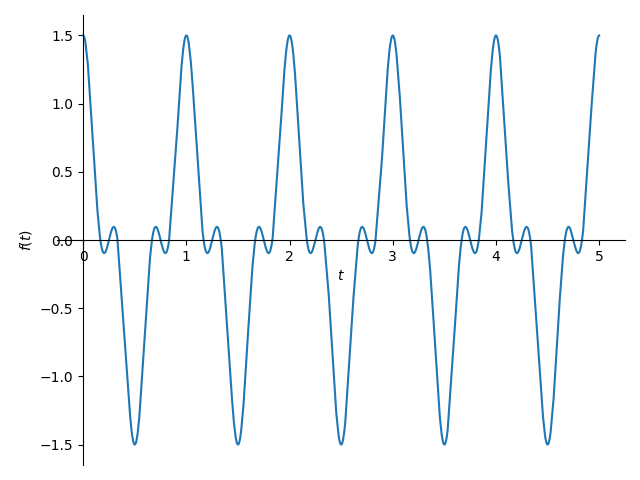

In [9]:
x = sym.cos(2*sym.pi*t) + 0.5*sym.cos(2*sym.pi*3*t)
sym.plot(x, (t, 0, 5));

Nem sempre é tão óbvio qual a frequência angular fundamental $\omega_0$. Por exemplo, o sinal abaixo:

$$x(t) = 2\cos(2\pi 2t)+ 3\cos(2\pi 3 t)$$

Num primeiro momento você pode achar que $\omega_0=4\pi$. Mas $6\pi$ não é múltiplo de $4\pi$, então esta não é a frequência angular fundamental. Nesse caso $\omega_0= 2\pi$ (com $A_1=0$) e o período fundamental é $T_0=\frac{2\pi}{2\pi}=1 s$.

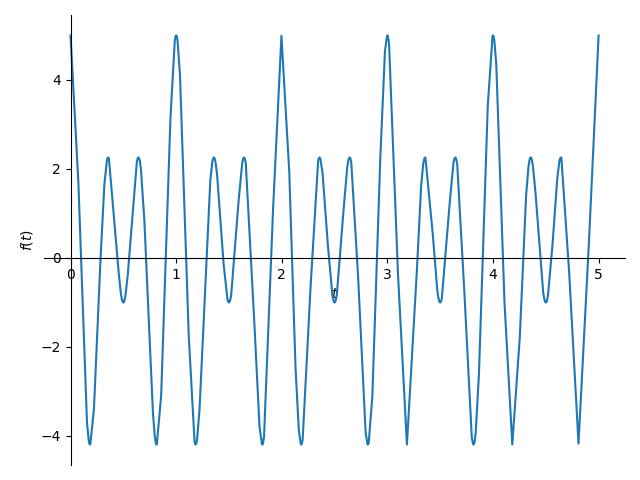

In [10]:
x = 2*sym.cos(2*sym.pi*2*t) + 3*sym.cos(2*sym.pi*3*t)
sym.plot(x, (t, 0, 5));

Então, de uma forma geral, para encontrarmos a frequência fundamental $\omega_0$ em um sinal gerado por uma soma de senoides é o máximo divisor comum entre as frequências de cada senoide que compõe o sinal.

---
### Exemplo 1

O sinal:

$x(t) = \cos(18\pi t) + 2\cos(30\pi t)$

tem a sua frequência fundamental $\omega_0 = 6\pi$ rad/s, já que $6$ é o máximo divisor comum entre 18 e 30. Consequentemente, o período fundamental é $T_0 = \frac{2\pi}{6\pi} = \frac{1}{3}$ s.


---

## Exercícios

**1)** Determine se os sinais abaixo são periódicos ou não. Se for periódico, determine qual o período fundamental do sinal.

a) $x_1(t) = je^{j10t}$

b) $x_2(t) = e^{j\left(t+\frac{\pi}{4}\right)}, t\geq 0$

c) $x_3(t) = e^{-1+j}t$

d) $x_4(t) = 2\cos(6t+2) - \mathrm{sen}(8t-1)$

e) $x_5(t) = \cos^2\left(\frac{\pi}{3}t \right)$

f) $x_6(t) = \cos(4\pi t + 60^\circ) - \mathrm{sen}(4\pi t + 60^\circ)$

g) $x_7(t) = \cos\left(\frac{4}{\pi} t + 30^\circ\right) - \mathrm{sen}(4\pi t + 30^\circ)$



**2)** Expresse a parte real dos seguintes sinais na forma $Ae^{-at}\cos(\omega t + \theta)$, com $A, a, \omega, \theta$ reais, com $A>0$ e $-\pi < \theta \leq \pi$.

a) $x_1(t) = -3$

b) $x_2(t) = 3e^{j\frac{\pi}{3}}\cos(2t+3\pi)$

c) $x_3(t) = e^{-2t}\mathrm{sen}\left(0.5t+\frac{\pi}{2}\right)$

d) $x_4(t) = je^{(-3+j50)t}$

**3)** Determine o período fundamental de cada um dos seguintes sinais:

a) $x_1(t) = 6\cos\left(\frac{2\pi}{3}t\right)+7\cos\left(\frac{\pi}{2}t\right)$

b) $x_2(t) = 6\cos\left(\frac{2\pi}{3}t\right)+7\cos\left(\sqrt{2}\pi t\right)$

c) $x_3(t) = 6\cos\left(\frac{2\pi}{3}t\right)+7\cos\left(\frac{2}{3}t\right)$

d) $x_4(t) = (3+j2)e^{j\frac{\pi}{3}t}$

e) $x_5(t) = (1+j2)e^{j\frac{2\pi}{3}t}+(4+j5)e^{j\frac{\pi}{3}t}$

f) $x_6(t) = (1+j2)e^{j\frac{1}{3}t}+(4+j5)e^{j\frac{1}{2}t}$

**4)** Estime a constante de tempo do sinal mostrado no gráfico abaixo:

ValueError: ignored

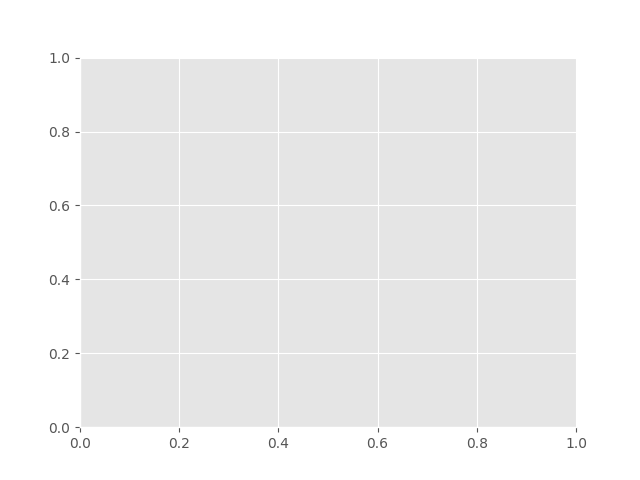

In [15]:
matplotlib.style.use('ggplot')
tau = 2.2
x = 5*sym.exp(-t/tau)
sym.plot(x, (t, 0, 8));

**5)** Um sinal do tipo $e^{\sigma t}\cos(\omega_0 t)$ podem ser escritos como uma soma de sinais $e^{s_1t}$ e $e^{s_2t}$, com $s_1=\sigma+j\omega_0$ e $s_2=\sigma-j\omega_0$ sendo a frequência complexa do sinal. Encontre o valor de $s_1$ e $s_2$ para os seguintes sinais:

a) $x_1(t)=\cos(3t)$

b) $x_2(t) = e^{-3t}\cos(2t)$

c) $x_3(t) = e^{-6t}$

d) $x_4(t) = 5$

e) $x_5(t) = e^{2t}\cos(4t)$

## Referências

- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007

## Solução dos exercícios

**1)** Resolvido por Catherine

Sabe-se que O período fundamental de uma onda senoidal complexa é definido como $T = \frac{2\pi}{\omega}$.

**a) É periódico**

$x_1(t) = je^{j10t}$

É uma onda senoidal complexa com frequência angular $\omega = 10$

Logo, o período fundamental de $x_1(t)$ é ${\frac{2\pi}{10}}$

**b) É periódico**

 $x_2(t + T) = e^{j\left(t + T + \frac{\pi}{4}\right)} = e^{j\left(t + \frac{\pi}{2}\right)} = e^{j\pi} = -1$.

 Como $-1$ é o negativo da unidade, podemos dizer que $x_2(t + T)$ é um deslocamento de fase de $\pi$ radianos em relação a $x_2(t)$.

logo,  $T = \frac{2\pi}{\omega} = {\frac{\pi}{2}}$.

**c) Não é periódico**

$x_3(t) = e^{-1+j}t$

$x_3(t + T) = e^{-1+j}(t + T) = e^{-1+j}t \cdot e^{-1+j}T$

Como $e^{-1+j}T$ é um número complexo com magnitude 1 e argumento arbitrário, podemos dizer que $x_3(t + T)$ é um deslocamento de fase arbitrário em relação a $x_3(t)$.

Um deslocamento de fase arbitrário não é equivalente a um período, podemos dizer que $x_3(t)$ não é periódico.

**d) Não é periódico**

$6(t + T) + 2 = 8(t + T) - 1$

$2(3(t + T) + 1) = 4(2(t + T) - 1)$

$3(t + T) + 1 = 2(t + T) - 1$.

- Simplificando a equação

$t + T = \frac{1}{2}$. Portanto, $T = \frac{1}{2} - t$.

Para que $x_4(t)$ seja periódico, $T$ deve ser um número real positivo. No entanto, $t$ pode ser qualquer número real. Portanto, não existe um valor de $T$ que satisfaça essa condição.

**e) É periódico**

$x_5(t + T) = \cos^2\left(\frac{\pi}{3}(t + T)\right) = \cos^2\left(\frac{\pi}{3}t + \frac{\pi}{3}T\right)$.

 Como $\cos^2(x)$ é um valor que varia entre 0 e 1, $\cos^2\left(\frac{\pi}{3}t + \frac{\pi}{3}T\right)$ é igual a $x_5(t)$ se e somente se $\frac{\pi}{3}T$ é um múltiplo de $2\pi$.

O menor múltiplo de $2\pi$ que é divisível por $\frac{\pi}{3}$ é $3\pi$.

Logo, o período fundamental de $x_5(t)$ é $T = {3}$.

**f) É periódico**

$x_6(t) = \cos(4\pi t + 60^\circ) - \sin(4\pi t + 60^\circ)$

Ambas as componentes trigonométricas $\cos(4\pi t + 60^\circ)$ e $-\sin(4\pi t + 60^\circ)$ têm a mesma frequência angular $4\pi$, o que implica um período de $T = \frac{2\pi}{4\pi} = \frac{1}{2}$

**g) É periódico**

1. $\cos\left(\frac{4}{\pi} t + 30^\circ\right)$ tem uma frequência angular de $\frac{4}{\pi}$, o que implica um período $T_1 = \frac{2\pi}{\frac{4}{\pi}} = \frac{\pi}{2}$

2. $-\sin(4\pi t + 30^\circ)$ tem uma frequência angular de $4\pi$, o que implica um período $T_2 = \frac{2\pi}{4\pi} = \frac{1}{2}$

Como $\frac{\pi}{2} > \frac{1}{2}$, o período de $T = \frac{1}{2}$


**2)** Resolvido por Catherine

**a)**

Dado que $x_1(t) = -3$ é uma constante, podemos escrevê-la como:

$x_1(t) = -3 \cdot e^{0t} \cdot \cos(0t + \theta)$

- A = -3
- a = 0
- $\omega = 0$
- $\theta$ é qualquer valor dentro do intervalo $-\pi < \theta \leq \pi$

$$x_{1,\text{real}}(t) = -3 \cdot e^{0t} \cdot \cos(0t + \theta) = -3\cos(\theta)$$

**b)**

Primeiro, vamos usar a identidade de Euler para escrever $3e^{j\frac{\pi}{3}}$:

$$x_2(t) = \left(3\cos\left(\frac{\pi}{3}\right) + 3j\sin\left(\frac{\pi}{3}\right)\right)\cos(2t+3\pi)$$

Agora, podemos separar a parte real e a parte imaginária dessa expressão:

$$x_2(t) = 3\cos\left(\frac{\pi}{3}\right)\cos(2t+3\pi) + 3\sin\left(\frac{\pi}{3}\right)\sin(2t+3\pi)j$$

$$x_{2,\text{real}}(t) = 3\cos\left(\frac{\pi}{3}\right)\cos(2t+3\pi) = \frac{3}{2}\cos(2t+3\pi)$$

- $A = \frac{3}{2}$
- $a = 0$
- $\omega = 2$
- $\theta = 3\pi$

**c)**

$x_3(t)$ em termos de uma função exponencial complexa:

$$x_3(t) = e^{-2t}\left(\frac{e^{j(0.5t+\frac{\pi}{2})} - e^{-j(0.5t+\frac{\pi}{2})}}{2j}\right)$$

$$x_3(t) = \frac{1}{2j}e^{-2t}\left(e^{j(0.5t+\frac{\pi}{2})} - e^{-j(0.5t+\frac{\pi}{2})}\right)$$

Utilizando a identidade de Euler $e^{j\theta} = \cos(\theta) + j\sin(\theta)$:

$$x_3(t) = \frac{1}{2j}e^{-2t}\left(\cos\left(0.5t+\frac{\pi}{2}\right) + j\sin\left(0.5t+\frac{\pi}{2}\right) - \cos\left(-0.5t-\frac{\pi}{2}\right) - j\sin\left(-0.5t-\frac{\pi}{2}\right)\right)$$

$$x_3(t) = \frac{1}{2j}e^{-2t}\left(\cos\left(0.5t+\frac{\pi}{2}\right) + j\sin\left(0.5t+\frac{\pi}{2}\right) - \cos\left(0.5t+\frac{\pi}{2}\right) + j\sin\left(0.5t+\frac{\pi}{2}\right)\right)$$

$$x_3(t) = \frac{1}{2j}e^{-2t}\cdot 2j\sin\left(0.5t+\frac{\pi}{2}\right)$$

$$x_3(t) = -e^{-2t}\sin\left(0.5t+\frac{\pi}{2}\right)$$

- $A = -1$
- $a = 2$
- $\omega = 0.5$
- $\theta = \frac{\pi}{2}$

$$x_{3,\text{real}}(t) = -e^{-2t}\sin\left(0.5t+\frac{\pi}{2}\right)$$

**d)**

Em termos de uma função exponencial complexa:

$$x_4(t) = je^{-3t}e^{j50t}$$

$$x_4(t) = je^{-3t}(\cos(50t) + j\sin(50t))$$

$$x_4(t) = -e^{-3t}\sin(50t) + je^{-3t}\cos(50t)$$

- $A = -e^{-3t}$
- $a = 0$
- $\omega = 50$
- $\theta = \frac{\pi}{2}$

$$x_{4,\text{real}}(t) = -e^{-3t}\sin(50t)$$

**3)** Resolvido por Catherine

**3a)**

Para determinar o período fundamental de uma senóide, podemos usar a seguinte fórmula:

$$T = \frac{2\pi}{\omega}$$

$$\omega_1 = \frac{2\pi}{3}$$

$$T_1 = \frac{2\pi}{\omega_1} = \frac{2\pi}{\frac{2\pi}{3}} = \boxed{3}$$



**3b)**

No caso do sinal $x_2(t)$, temos:

$$\omega_2 = \sqrt{2}\pi$$

Portanto, o período fundamental de $x_2(t)$ é:

$$T_2 = \frac{2\pi}{\omega_2} = \frac{2\pi}{\sqrt{2}\pi} = \boxed{2\sqrt{2}}$$


O sinal $x_2(t)$ completa um ciclo completo em $2\sqrt{2}$ unidades de tempo.



**3c)**

No caso do sinal $x_3(t)$, temos:

$$\omega_3 = \frac{2}{3}$$


Portanto, o período fundamental de $x_3(t)$ é:

$$T_3 = \frac{2\pi}{\omega_3} = \frac{2\pi}{\frac{2}{3}} = \boxed{3\pi}$$


O sinal $x_3(t)$ completa um ciclo completo em $3\pi$ unidades de tempo.

**3d)**

$$x_4(t) = (3+j2)e^{j\frac{\pi}{3}t}$$

$$\omega = \frac{\pi}{3}$$
$$f = \frac{\omega}{2\pi} = \frac{1}{3}$$

$$T_4 = \frac{1}{f} = \frac{1}{\frac{1}{3}} = 3$$

**3e)**

1. $(1+j2)e^{j\frac{2\pi}{3}t}$ tem uma frequência angular de $\frac{2\pi}{3}$
2. $(4+j5)e^{j\frac{\pi}{3}t}$ tem uma frequência angular de $\frac{\pi}{3}$

Como $\frac{\pi}{3} < \frac{2\pi}{3}$, o período fundamental é:

$$T_5 = \frac{2\pi}{\frac{\pi}{3}} = 6$$

**3f)**

1. $(1+j2)e^{j\frac{1}{3}t}$ tem uma frequência angular de $\frac{1}{3}$
2. $(4+j5)e^{j\frac{1}{2}t}$ tem uma frequência angular de $\frac{1}{2}$

Como $\frac{1}{3} < \frac{1}{2}$, o período fundamental é:

$$T_6 = \frac{2\pi}{\frac{1}{3}} = 6\pi$$



**4-)** Por Frederico Guazzelli

Para definir a constante de tempo, devemos olhar primeiramente a seu valor inicial, que é $5$, depois o valor onde o gárafico decai $63,2\%$ do valor inicial, que se da por $5*0,632 = 3,16$ subtraindo do valor inicial, teremos que ver ver, aproximadamente onde o tempo atinge $5-3,16 = 1,84$. Então, é possível estimar que a constante de tempo está próxima de $2,2$ segundos.

**5)** Respondido por Catherine

a) $x_1(t) = \cos(3t)$

Não há componente exponencial $e^{\sigma t}$ no sinal original. Portanto, $s_1$ e $s_2$ são ambos puramente imaginários:

$s_1 = j \cdot 3$ e $s_2 = -j \cdot 3$

b) $x_2(t) = e^{-3t} \cos(2t)$

$\sigma = -3$ (parte real do termo exponencial) e $\omega_0 = 2$

Portanto, $s_1 = -3 + j2$ e $s_2 = -3 - j2$

c) $x_3(t) = e^{-6t}$

$\sigma = -6$ (parte real do termo exponencial) e $\omega_0 = 0$ (não há parte imaginária).

Portanto, $s_1 = -6$ e $s_2 = -6$

d) $x_4(t) = 5$

Este é um sinal constante sem componente exponencial, logo para $\sigma$ quanto $\omega_0$ o valor é 0.

Portanto, $s_1 = 0$ e $s_2 = 0$

e) $x_5(t) = e^{2t} \cos(4t)$

$\sigma = 2$ (parte real do termo exponencial) e $\omega_0 = 4$

Portanto, $s_1 = 2 + j4$ e $s_2 = 2 - j4$